In [1]:
%matplotlib inline

# Chapter 2. Decision trees for classification

## Loading dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('extraterrestrials.csv', sep='\t', encoding='utf-8', index_col=0)

In [4]:
df.head()

,length,color,fluffy,label
0,27.545139,pink gold,True,rabbosaurus
1,12.147357,pink gold,False,platyhog
2,23.454173,light black,True,rabbosaurus
3,29.956698,pink gold,True,rabbosaurus
4,34.884065,light black,True,rabbosaurus


In [5]:
len(df)

1000

In [6]:
df.sample(5)

,length,color,fluffy,label
82,38.147671,pink gold,True,rabbosaurus
840,34.679942,light black,True,rabbosaurus
270,18.141100,light black,False,platyhog
898,34.282774,light black,True,rabbosaurus
681,33.736965,light black,True,rabbosaurus


## Exploratory data analysis
### Summary statistics

In [7]:
df.label.tail()

995    rabbosaurus
996       platyhog
997       platyhog
998    rabbosaurus
999       platyhog
Name: label, dtype: object

In [8]:
df.label.value_counts()

platyhog       520
rabbosaurus    480
Name: label, dtype: int64

In [9]:
grouped = df.groupby('label')

In [10]:
grouped.length.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
platyhog,520.0,19.894876,4.653044,4.164723,16.646311,20.168655,22.850191,32.779472
rabbosaurus,480.0,29.984387,5.072308,16.027639,26.721621,29.956092,33.826660,47.857896


In [11]:
grouped.color.value_counts()

label        color           
platyhog     light black         195
             purple polka-dot    174
             pink gold           151
rabbosaurus  light black         168
             pink gold           156
             space gray          156
Name: color, dtype: int64

In [12]:
grouped.fluffy.value_counts()

label        fluffy
platyhog     False     358
             True      162
rabbosaurus  True      430
             False      50
Name: fluffy, dtype: int64

Read more at: https://pandas.pydata.org/pandas-docs/stable/basics.html

### Visualizing data

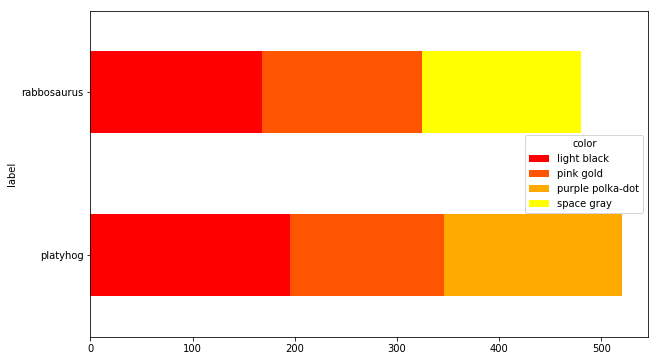

In [13]:
plot = grouped.color.value_counts().unstack().plot(kind='barh', stacked=True, figsize=[10,6], colormap='autumn')

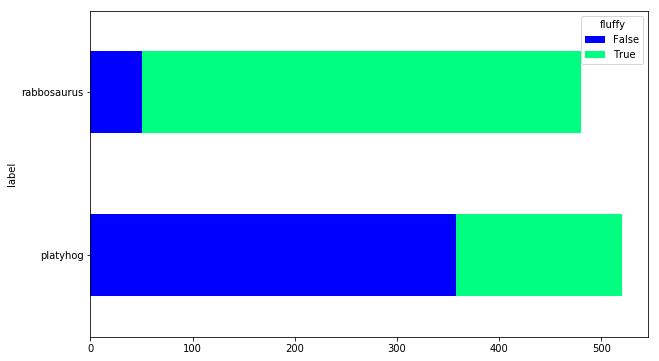

In [14]:
plotplt = grouped.fluffy.value_counts().unstack().plot(kind='barh', stacked=True, figsize=[10,6], colormap='winter')

Read more at: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/

Color palettes: http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps

In [15]:
import matplotlib.pyplot as plt

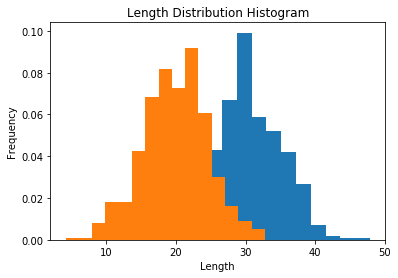

In [16]:
figure = plt.figure()
plt.hist(df[df.label == 'rabbosaurus'].length, bins=15, normed=True)
plt.hist(df[df.label == 'platyhog'].length, bins=15, normed=True)

plt.title("Length Distribution Histogram")
plt.xlabel("Length")
plt.ylabel("Frequency")

fig = plt.gcf()
plt.show()
# figure.savefig('length.png', figsize=(800, 800), dpi=300)

Read more at: https://matplotlib.org/users/tutorials.html#introductory

## Data preprocessing

In [17]:
df.dtypes

length    float64
color      object
fluffy       bool
label      object
dtype: object

In [18]:
df.color = df.color.astype('category')
df.label = df.label.astype('category')

In [19]:
df.dtypes

length     float64
color     category
fluffy        bool
label     category
dtype: object

In [20]:
colors = df.color.cat.categories.get_values().astype('string')
colors

array(['light black', 'pink gold', 'purple polka-dot', 'space gray'],
      dtype='|S16')

In [21]:
df.head()

,length,color,fluffy,label
0,27.545139,pink gold,True,rabbosaurus
1,12.147357,pink gold,False,platyhog
2,23.454173,light black,True,rabbosaurus
3,29.956698,pink gold,True,rabbosaurus
4,34.884065,light black,True,rabbosaurus


Documentation: https://pandas.pydata.org/pandas-docs/stable/categorical.html

### Converting categorical variables
Converting colors to one-hot vectors.

In [22]:
features = df.loc[:,:'fluffy']
labels = df.label

In [23]:
features = pd.get_dummies(features, columns = ['color'])
features.head()

,length,fluffy,color_light black,color_pink gold,color_purple polka-dot,color_space gray
0,27.545139,True,0,1,0,0
1,12.147357,False,0,1,0,0
2,23.454173,True,1,0,0,0
3,29.956698,True,0,1,0,0
4,34.884065,True,1,0,0,0


Documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

An alternative way to convert to one-hot encoding using Scikit-Learn: http://scikit-learn.org/stable/modules/preprocessing.html

### Data splitting

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 6), (700,), (300, 6), (300,))

In [27]:
# data_to_save = pd.concat([X_test, y_test], axis=1)
# data_to_save.to_csv("data_test.csv", sep='\t', encoding='utf-8')

## Training the decision tree classifier

In [28]:
from sklearn import tree

In [29]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_model = tree_model.fit(X_train, y_train)

In [30]:
tree_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

Documentation: http://scikit-learn.org/stable/modules/tree.html

## Tree visualization

In [31]:
labels = df.label.astype('category').cat.categories
labels = list(labels)
labels

[u'platyhog', u'rabbosaurus']

In [32]:
feature_names = map(lambda x: x.encode('utf-8'), features.columns.get_values())
feature_names

['length',
 'fluffy',
 'color_light black',
 'color_pink gold',
 'color_purple polka-dot',
 'color_space gray']

You need to install Graphviz - opensource tool for graphs visualizing. 
It can be downloaded from http://www.graphviz.org/ or using Homebrew:
`brew install graphviz`

In [33]:
import pydotplus 

In [34]:
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names=feature_names,  
                                 class_names=labels,  
                                 filled=True, rounded=True,  
                                 special_characters=True)
dot_data

u'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<length &le; 26.6917<br/>entropy = 0.9971<br/>samples = 700<br/>value = [372, 328]<br/>class = platyhog>, fillcolor="#e581391e"] ;\n1 [label=<color_space gray &le; 0.5<br/>entropy = 0.7117<br/>samples = 436<br/>value = [351, 85]<br/>class = platyhog>, fillcolor="#e58139c1"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<fluffy &le; 0.5<br/>entropy = 0.5722<br/>samples = 406<br/>value = [351, 55]<br/>class = platyhog>, fillcolor="#e58139d7"] ;\n1 -> 2 ;\n3 [label=<length &le; 22.4769<br/>entropy = 0.2401<br/>samples = 253<br/>value = [243, 10]<br/>class = platyhog>, fillcolor="#e58139f5"] ;\n2 -> 3 ;\n4 [label=<entropy = 0.0<br/>samples = 182<br/>value = [182, 0]<br/>class = platyhog>, fillcolor="#e58139ff"] ;\n3 -> 4 ;\n5 [label=<color_purple polka-dot &le; 0.5<br/>entropy = 0.5864<br/>samples = 71<br/>value = [61, 10]<br/>

In [35]:
graph = pydotplus.graph_from_dot_data(dot_data.encode('utf-8'))

In [36]:
graph.write_png('tree1.png')

True

![](tree1.png)

## Making predictions

In [37]:
samples = [[24,1,0,1,0,0], [34,0,0,0,1,0]]
tree_model.predict(samples)

array([u'platyhog', u'rabbosaurus'], dtype=object)

In [38]:
tree_model.predict_proba(samples)

array([[ 1.,  0.],
       [ 0.,  1.]])

## Model Evaluation

Loss on training data

In [39]:
tree_model.score(X_train, y_train)

1.0

Loss on test data

In [40]:
tree_model.score(X_test, y_test)

0.87666666666666671

Documentation: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

## Limiting tree depth

In [41]:
len(feature_names)

6

In [42]:
tree_model.max_depth = 4
tree_model = tree_model.fit(X_train, y_train)

In [43]:
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names=feature_names,  
                                 class_names=labels,  
                                 filled=True, rounded=True,  
                                 special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.encode('utf-8'))
# graph.write_png('tree2.png')

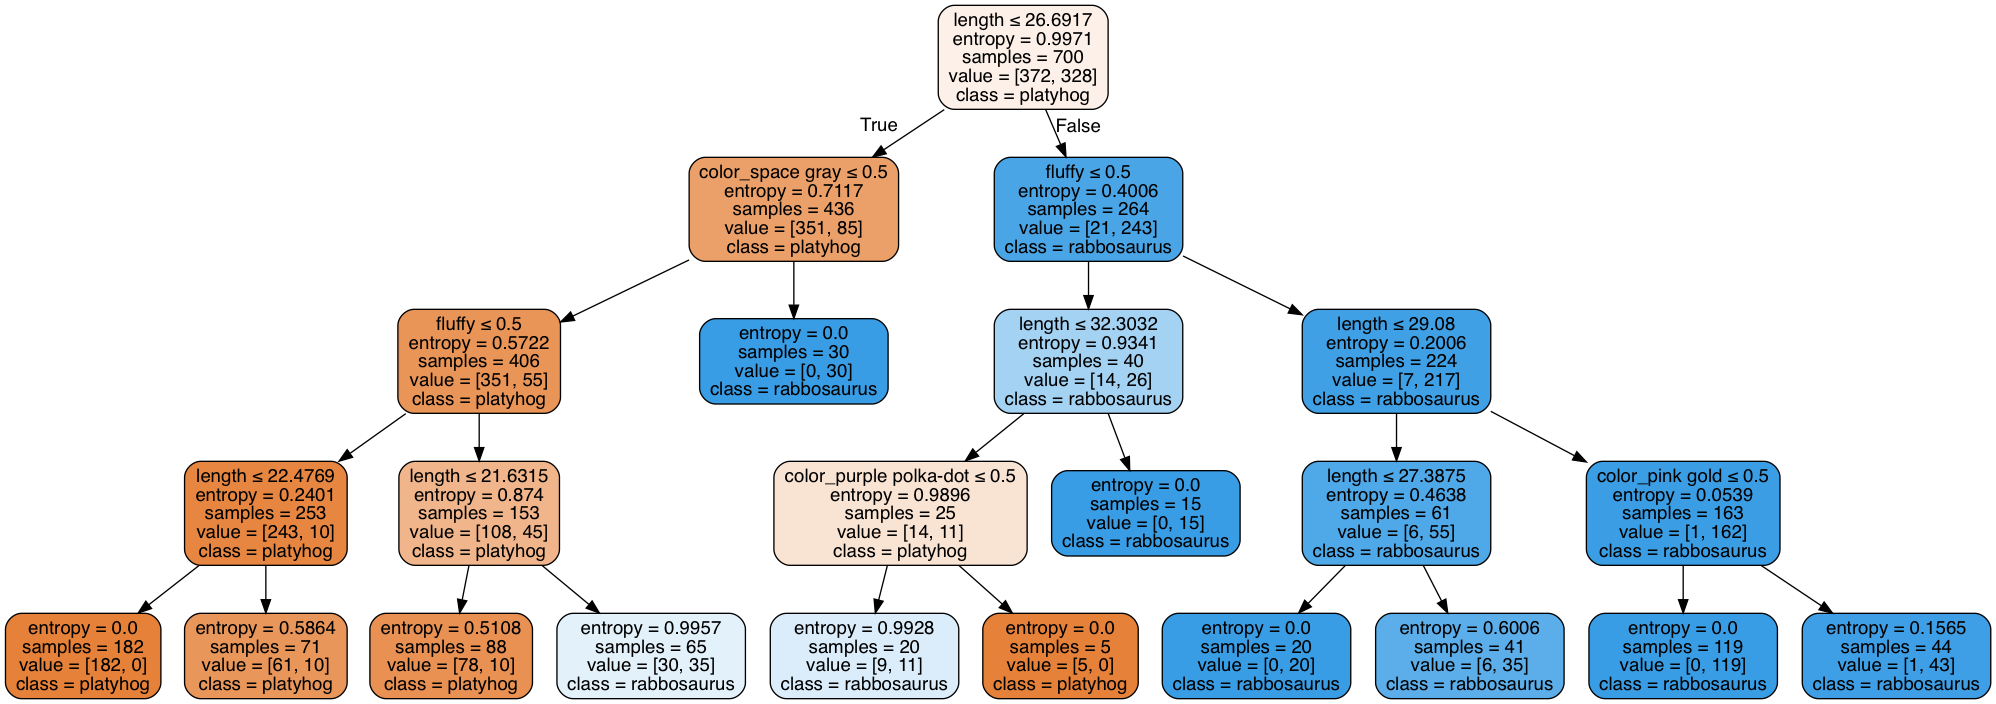

In [44]:
from IPython.display import Image
Image(graph.create_png()) 

Loss on training data

In [45]:
tree_model.score(X_train, y_train)

0.90571428571428569

Loss on test data

In [46]:
tree_model.score(X_test, y_test)

0.92000000000000004

In [47]:
train_losses = []
test_losses = []

In [48]:
for depth in xrange(1, 23):
    tree_model.max_depth = depth
    tree_model = tree_model.fit(X_train, y_train)
    train_losses.append(1 - tree_model.score(X_train, y_train))
    test_losses.append(1 - tree_model.score(X_test, y_test))

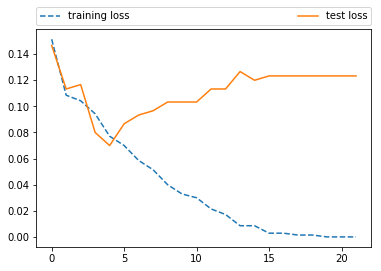

In [49]:
figure = plt.figure() 
# figure.set_size_inches(5.5, 5.5)
plt.plot(train_losses, label="training loss", linestyle='--')
plt.plot(test_losses, label="test loss")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
# figure.savefig('loss.png', dpi=300, pad_inches=0)

## Performance evaluation

### Precision and recall

In [50]:
import numpy as np

In [51]:
predictions = tree_model.predict(X_test)
predictions = np.array(map(lambda x: x == 'rabbosaurus', predictions), dtype='int')
true_labels = np.array(map(lambda x: x == 'rabbosaurus', y_test), dtype='int')

In [52]:
from sklearn.metrics import precision_score, recall_score

In [53]:
precision_score(true_labels, predictions)

0.87096774193548387

In [54]:
recall_score(true_labels, predictions)

0.88815789473684215

### *F*<sub>1</sub> score

In [55]:
from sklearn.metrics import f1_score

In [56]:
f1_score(true_labels, predictions)

0.87947882736156346

Documentation: http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics

### Cross-validation

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_model, features, df.label, cv=10)
np.mean(scores)

0.88300000000000001

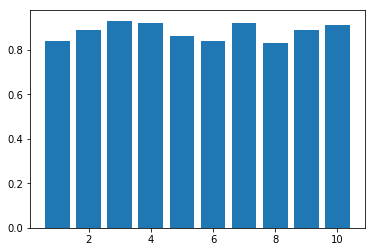

In [58]:
figure = plt.figure() 
# figure.set_size_inches(5.5, 5.5)
plot = plt.bar(range(1,11), scores)
# figure.savefig('cv.png', dpi=300, pad_inches=0)

In [59]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.07)


Documentation: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

### Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
conf_matrix = confusion_matrix(y_test, tree_model.predict(X_test))
conf_matrix

array([[128,  20],
       [ 17, 135]])

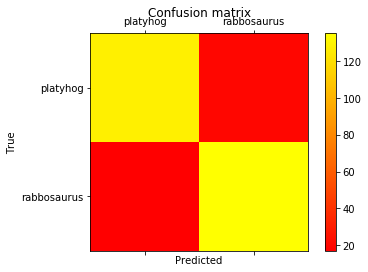

In [62]:
fig = plt.figure()
plt.autumn()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Plotting confusion matrix: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

## Exporting model for iOS

In [63]:
import coremltools as coreml

In [64]:
coreml_model = coreml.converters.sklearn.convert(tree_model, feature_names, 'label')
coreml_model.save('DecisionTree.mlmodel')

Documentation: http://pythonhosted.org/coremltools/generated/coremltools.converters.sklearn.convert.html#coremltools.converters.sklearn.convert

## Random Forest classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_model = RandomForestClassifier(criterion = 'entropy', random_state=42)
rf_model = rf_model.fit(X_train, y_train)

In [67]:
print(rf_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)


Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## Performance evaluation

Loss on training data

In [68]:
rf_model.score(X_train, y_train)

0.98999999999999999

Loss on test data

In [69]:
rf_model.score(X_test, y_test)

0.90333333333333332

### Cross-validation

In [70]:
scores = cross_val_score(rf_model, features, df.label, cv=10)
np.mean(scores)

0.89700000000000002

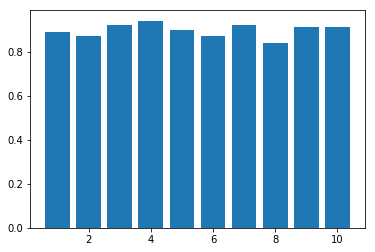

In [71]:
plot = plt.bar(range(1,11), scores)

In [72]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.06)


### Precision and recall

In [73]:
predictions = rf_model.predict(X_test)
predictions = np.array(map(lambda x: x == 'rabbosaurus', predictions), dtype='int')
true_labels = np.array(map(lambda x: x == 'rabbosaurus', y_test), dtype='int')

In [74]:
precision_score(true_labels, predictions)

0.9072847682119205

In [75]:
recall_score(true_labels, predictions)

0.90131578947368418

### *F*<sub>1</sub> score

In [76]:
f1_score(true_labels, predictions)

0.90429042904290435

### Confusion Matrix

In [77]:
conf_matrix = confusion_matrix(y_test, rf_model.predict(X_test))
conf_matrix

array([[134,  14],
       [ 15, 137]])

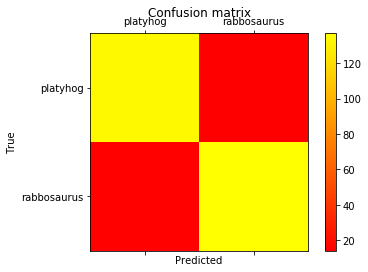

In [78]:
fig = plt.figure()
plt.autumn()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Exporting model for iOS

In [79]:
coreml_model = coreml.converters.sklearn.convert(rf_model, feature_names, 'label')
coreml_model.save('RandomForest.mlmodel')